In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import AvgPool2D, MaxPool2D, Dense
from keras.layers import Activation, Dropout, BatchNormalization, Flatten
from keras.optimizers import Adam, SGD, RMSprop

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
data='/kaggle/input/covid-19-x-ray-10000-images/dataset'

In [3]:
os.listdir(data)

['normal', 'covid']

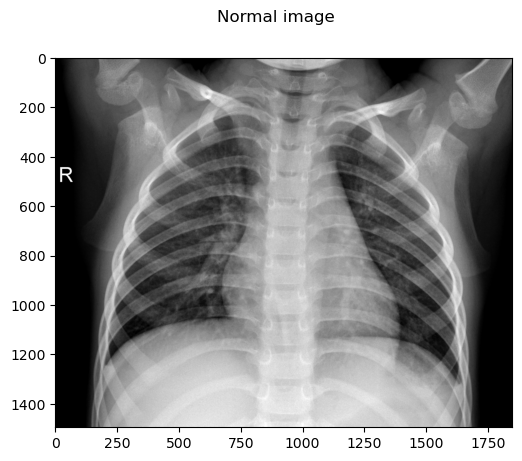

In [4]:
normal_images=[]
for img_path in glob.glob(data +'/normal/*'):
    normal_images.append(mping.imread(img_path))
fig=plt.figure()
fig.suptitle("Normal image")
plt.imshow(normal_images[0],cmap='gray')

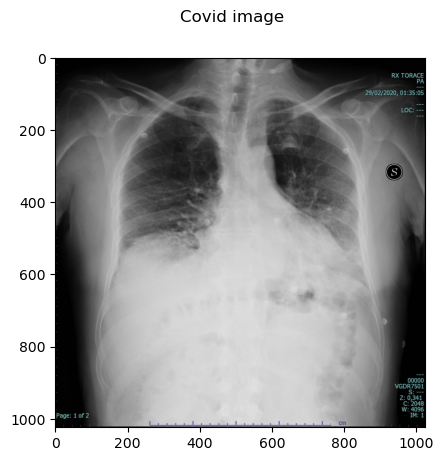

In [5]:
covid_images=[]
for img_path in glob.glob(data +'/covid/*'):
    covid_images.append(mping.imread(img_path))
fig=plt.figure()
fig.suptitle("Covid image")
plt.imshow(covid_images[0],cmap='gray')

In [6]:
image_width=150
image_height=150
cannels=3

INPUT_SHAPE = (image_width, image_height, cannels)
nb_classes = 2
epochs = 10
batch_size = 6


In [7]:
model =Sequential()
model.add(Conv2D(32, (3, 3),input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu"))
model.add(Conv2D(258, (3,3)))
model.add(Activation("relu"))
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2)) 
model.add(Conv2D(256, (2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense (32))
model.add(Dropout (0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 258)       148866    
                                                        

In [9]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=("accuracy"))

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


/tmp/ipykernel_29/1010883660.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
12/12 [==============================] - 16s 335ms/step - loss: 0.7321 - accuracy: 0.6618 - val_loss: 0.6358 - val_accuracy: 0.7083
Epoch 2/10
12/12 [==============================] - 3s 216ms/step - loss: 0.6672 - accuracy: 0.7059 - val_loss: 0.6315 - val_accuracy: 0.7083
Epoch 3/10
12/12 [==============================] - 3s 229ms/step - loss: 0.6569 - accuracy: 0.6912 - val_loss: 0.6064 - val_accuracy: 0.7083
Epoch 4/10
12/12 [==============================] - 3s 249ms/step - loss: 0.5693 - accuracy: 0.7353 - val_loss: 0.4903 - val_accuracy: 0.7917
Epoch 5/10
12/12 [==============================] - 5s 460ms/step - loss: 0.4148 - accuracy: 0.8382 - val_loss: 0.2630 - val_accuracy: 0.8750
Epoch 6/10
12/12 [==============================] - 3s 213ms/step - loss: 0.7838 - accuracy: 0.8333 - val_loss: 0.4672 - val_accuracy: 0.7917
Epoch 7/10
12/12 [==============================] - 2s 202ms/step - loss: 0.2993 - accuracy: 0.8971 - val_loss: 0.3918 - val_accuracy: 0.8333
Epoch

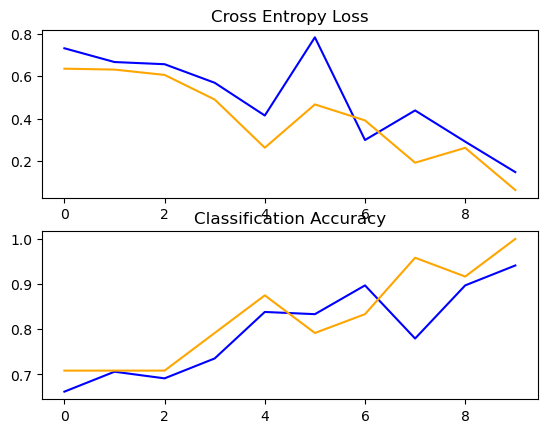

In [11]:
from matplotlib import pyplot as plt


plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

plt.subplot(2, 1, 2)
plt.title('\nClassification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()